# Perceptron

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
class Perceptron:
    def __init__(self,X):
        self.X = np.array(X)
        self.weights = []
    ## calculate weights
    def getWeights(self,X):
        return([np.random.rand(len(X))])
    ## transfer function
    def transfer(self,X,weights):
        return(np.sum(self.X * weights))
    ## activation function
    def activate(self,Xt):
        if(Xt > 1):
            return(1)
        else:
            return(-1)


We will run an example iteratively

In [3]:
for i in range(0,5):
    for j in range(0,5):
        X = [i,j]
        p1 = Perceptron(X)
        w = p1.getWeights(X)
        t = p1.transfer(X,weights=w)
        print(p1.activate(t))


-1
-1
-1
1
-1
-1
-1
1
1
1
1
-1
1
1
1
-1
1
1
1
1
1
1
1
-1
1


### Converting the Perceptron to a Supervised Learning Algorithm

In [4]:
## loss_function
def loss_function(y, y_hat):
    return(np.sum((y - y_hat)**2)/len(y) )

In [5]:
def grad(X,y,yhat):
    n = len(y)    
    return((1 / n) * np.dot((yhat - y),X))

#np.dot((yhat-y),X0)

In [6]:
def gradientDesc(X,y,learn_rate=1e-6,max_iter=1e3):
    conv_threshold = 1e-4
    n = X.ndim
    w = np.random.rand(n+1)
    X = pd.DataFrame({'X0':1,'X':X})
    yhat = np.dot(X,w)
    cost = loss_function(y,yhat)
    converged = False
    iterations = 0
    while(converged == False):
        ## Implement the gradient descent algorithm
        w_new = w - (np.array(learn_rate) * grad(X,y,yhat))
        w = w_new
        yhat = np.dot(X,w)
        cost_new = loss_function(y,yhat)
        if(iterations % 100 == 0):
            print("%s,%s" % (iterations,cost_new))
        if(cost - cost_new <= conv_threshold):
            converged = True
            return(w)
        iterations = iterations + 1
        if(iterations > max_iter):
            converged = True
            return(w)


In [7]:
class Perceptron:
    def __init__(self,X,y):
        self.X = np.array(X)
        self.y = np.array(y)
        self.weights = []
    ## calculate weights
    def getWeights(self,X,y):
        return(gradientDesc(X,y,learn_rate=0.0001))
    ## transfer function
    def transfer(self,X,weights):
        df = pd.DataFrame({'X0':1,'X':X})
        X0 = np.array(df)
        return(np.dot(X0,w))
    ## activation function: in this case we will use a linear function f(x) = x
    def activate(self,y_hat):
        return(y_hat)


Now we will define a dataset

In [8]:
df = pd.DataFrame({'X':[10,20,30,40,50,20,30,20,30,50,60,40,30,20,10],
                   'y':[1,2,3,4,5,2,3,2,3,5,6,4,3,2,1]})
df.head()

,X,y
0,10,1
1,20,2
2,30,3
3,40,4
4,50,5


In [9]:
X = df.X
y = df.y

and will run the perceptron on this data

In [10]:
p1 = Perceptron(X,y)
w = p1.getWeights(X,y)
y_hat = p1.transfer(X,w)
print(p1.activate(y_hat))

0,306.4081010992155
100,0.15274380424539216
200,0.15219576557985454
300,0.15164970113060877
400,0.15110559591052816
500,0.15056344289007806
600,0.15002323506494505
700,0.1494849654559472
800,0.14894862710894247
900,0.14841421309474007
1000,0.1478817165090101
[1.66424046 2.42168808 3.1791357  3.93658332 4.69403095 2.42168808
 3.1791357  2.42168808 3.1791357  4.69403095 5.45147857 3.93658332
 3.1791357  2.42168808 1.66424046]


In [12]:
(np.array(y),p1.activate(y_hat))

(array([1, 2, 3, 4, 5, 2, 3, 2, 3, 5, 6, 4, 3, 2, 1], dtype=int64),
 array([1.66424046, 2.42168808, 3.1791357 , 3.93658332, 4.69403095,
        2.42168808, 3.1791357 , 2.42168808, 3.1791357 , 4.69403095,
        5.45147857, 3.93658332, 3.1791357 , 2.42168808, 1.66424046]))

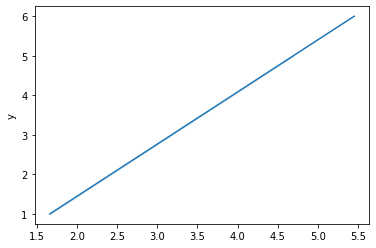

In [13]:
sns.lineplot(x=p1.activate(y_hat), y=y)

### Test on a dataset


In [14]:
## loss_function
def loss_function(y, y_hat):
    return(np.sum((y - y_hat)**2))

In [15]:
def grad(X,y,yhat):
    n = len(y)    
    return((1 / n) * np.dot((yhat - y),X))
    #return(np.dot((yhat - y),X))

In [16]:
def gradientDesc(X,y,learn_rate=1e-6,max_iter=1e4):
    conv_threshold = 1e-4
    n = X.shape[1]
    w = np.random.rand(n)
    yhat = np.dot(X,w)
    cost = loss_function(y,yhat)
    converged = False
    iterations = 0
    while(converged == False):
        ## Implement the gradient descent algorithm
        w_new = w - (np.array(learn_rate) * grad(X,y,yhat))
        w = w_new
        yhat = np.dot(X,w)
        cost_new = loss_function(y,yhat)
        if(iterations % 100 == 0):
            print("%s,%s" % (iterations,cost_new))
        if(cost - cost_new <= conv_threshold):
            converged = True
            return(w)
        iterations = iterations + 1
        if(iterations > max_iter):
            converged = True
            return(w)


In [17]:
class Perceptron:
    def __init__(self,X,y):
        self.X = np.array(X)
        self.y = np.array(y)
        self.weights = []
    ## calculate weights
    def getWeights(self,X,y):
        return(gradientDesc(X,y))
    ## transfer function
    def transfer(self,X,weights):
        #df = pd.DataFrame(X)
        X0 = np.array(X)
        return(np.dot(X0,w))
    ## activation function: in this case we will use a linear function f(x) = x
    def activate(self,y_hat):
        return(y_hat)


In [18]:
### Activation Function
def sigmoid(z):
    return(1/(1 + np.exp(-z))) 

def linear(x):
    return(x)


In [19]:
df = pd.read_csv("C:/Users/Thomas/Documents/BIDS/stats/bodyfat.csv")
df.head()

,density,body_fat_pct,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [20]:
X = df[["density","age","weight","height","neck","chest","abdomen","hip","thigh","knee","ankle","biceps","forearm","wrist"]]
y = df["body_fat_pct"]

In [21]:
X.shape

(252, 14)

In [23]:
p1 = Perceptron(X,y)
w = p1.getWeights(X,y)
y_hat = p1.transfer(X,w)
y_hat = p1.activate(y_hat)
print(y_hat)

0,45964860.92822965
100,71010.57611454057
200,68087.9689904443
300,65312.776170223304
400,62673.628574836664
500,60163.78955619802
600,57776.8566784439
700,55506.74512592706
800,53347.67193552992
900,51294.14101197745
1000,49340.92888726154
1100,47483.07118722
1200,45715.84977014898
1300,44034.78050407246
1400,42435.60165094921
1500,40914.26282767467
1600,39466.914515230565
1700,38089.89808875955
1800,36779.73634269307
1900,35533.12448634655
2000,34346.921586616154
2100,33218.14243557344
2200,32143.94982185502
2300,31121.64718579447
2400,30148.671639238255
2500,29222.58733193475
2600,28341.07914728492
2700,27501.946711097575
2800,26703.098697805406
2900,25942.547419368828
3000,25218.403682829892
3100,24528.871903174077
3200,23872.245458821984
3300,23246.9022777015
3400,22651.300642449936
3500,22083.975203864513
3600,21543.533192259474
3700,21028.650816902227
3800,20538.06984418897
3900,20070.59434568356
4000,19625.087607585167
4100,19200.46919360827
4200,18795.71215365717
4300,18409.84

In [24]:
X.head()

,density,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


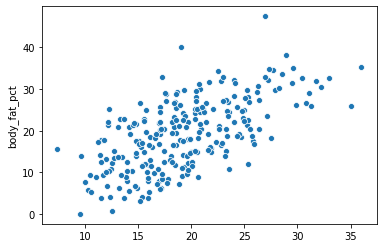

In [25]:
sns.scatterplot(x=y_hat, y=y)

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error 

print("R^2={}".format(r2_score(y, y_hat)))
print("MAE={}".format(mean_absolute_error(y, y_hat)))

R^2=0.3955479139266478
MAE=5.380208667749427


## Classification

In [29]:
## -log P(yt|yp) = - SUM( (yt log(yp) + (1 - yt) log(1 - yp)) )/N
## loss_function
def logloss_function(y, y_hat):
    return(-sum(((y*np.log(y_hat+1e-6)) + (1-y*np.log(1-y_hat+1e-6))))/len(y))

In [31]:
def gradientDesc(X,y,learn_rate=1e-5,max_iter=1e4):
    conv_threshold = 1e-4
    n = X.shape[1]
    w = np.random.rand(n)
    yhat = np.dot(X,w)
    cost = logloss_function(y,yhat)
    converged = False
    iterations = 0
    while(converged == False):
        ## Implement the gradient descent algorithm
        w_new = w - (np.array(learn_rate) * grad(X,y,yhat))
        w = w_new
        z = np.dot(X,w)
        yhat = sigmoid(z)
        cost_new = logloss_function(y,yhat)
        if(iterations % 100 == 0):
            print("iter: %s,cost: %s" % (iterations,cost_new))
        if(cost - cost_new <= conv_threshold):
            converged = True
            return(w)
        iterations = iterations + 1
        if(iterations > max_iter):
            converged = True
            return(w)


In [32]:
df = pd.read_csv("C:/Users/Thomas/Documents/BIDS/course/DataScience/data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
X = df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y = df["Outcome"]

In [34]:
X.shape

(768, 8)

In [35]:
p1 = Perceptron(X,y)
w = p1.getWeights(X,y)
y_hat = p1.transfer(X,w)
y_hat= p1.activate(sigmoid(y_hat))
print(y_hat)

C:\Users\Thomas\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


iter: 0,cost: -5.821027431510186
iter: 100,cost: -5.797757523578192
iter: 200,cost: -4.882374076163291
iter: 300,cost: -3.2157569993481325
iter: 400,cost: -2.209204515952234
iter: 500,cost: -1.6398886554959509
iter: 600,cost: -1.2557073300962325
iter: 700,cost: -0.9276820593475543
iter: 800,cost: -0.574387809906096
iter: 900,cost: -0.16140591919167405
iter: 1000,cost: 0.19635397069971305
iter: 1100,cost: 0.40500563100615333
iter: 1200,cost: 0.48256243900329326
iter: 1300,cost: 0.4599692574723356
iter: 1400,cost: 0.36309173255383204
iter: 1500,cost: 0.22468373719047952
iter: 1600,cost: 0.07931165837058966
iter: 1700,cost: -0.06225850266970979
iter: 1800,cost: -0.19682394984532306
iter: 1900,cost: -0.3082291484916959
iter: 2000,cost: -0.39633873000114245
iter: 2100,cost: -0.47125414053320447
iter: 2200,cost: -0.5317914132959367
iter: 2300,cost: -0.5777506528986065
iter: 2400,cost: -0.6133346594744445
iter: 2500,cost: -0.6421182971389746
iter: 2600,cost: -0.6664606556365632
iter: 2700,cos

In [36]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [37]:
yhat_cat = y_hat.copy()
yhat_cat[yhat_cat>=0.5] = 1
yhat_cat[yhat_cat<0.5] = 0

pd.crosstab(yhat_cat, y)

Outcome,0,1
row_0,,
0.0,344,137
1.0,156,131


In [38]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y, y_hat))


0.6334477611940299
